![grafik.png](attachment:grafik.png)

# WAIA Data Science with Python 2021 - Week 8 Exercises

scikit learn comes with a number of datasets that we can use to develop basic machine learning solutions. In this homework, we will deal with the breast cancer dataset.

Here you can find more information about the dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Import the dataset from scikit-learn into a DataFrame called bc. Note that the load_.. function in scikit learn will not directly return a DataFrame but a Bunch object. Read more about this in the scikit-learn documentation.

In [73]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
bc = load_breast_cancer()
df_bc = pd.DataFrame(bc.data, columns=bc.feature_names)

Examine the first 5 rows of the dataset and its shape

In [74]:
display(df_bc.head())
display(df_bc.shape)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(569, 30)

Now let's add another column called "diagnosis" and assign it the target variable from the dataset.

In [75]:
df_target = pd.DataFrame(bc.target, columns= ['diagosis'])
df = pd.concat([df_bc, df_target], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


How many benign (1) and malign (0) tumor diagnoses are in the dataset?

In [76]:
df['diagosis'].value_counts()

1    357
0    212
Name: diagosis, dtype: int64

Is there any missing data?

In [77]:
df[bc.feature_names].isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Any apparent outliers?

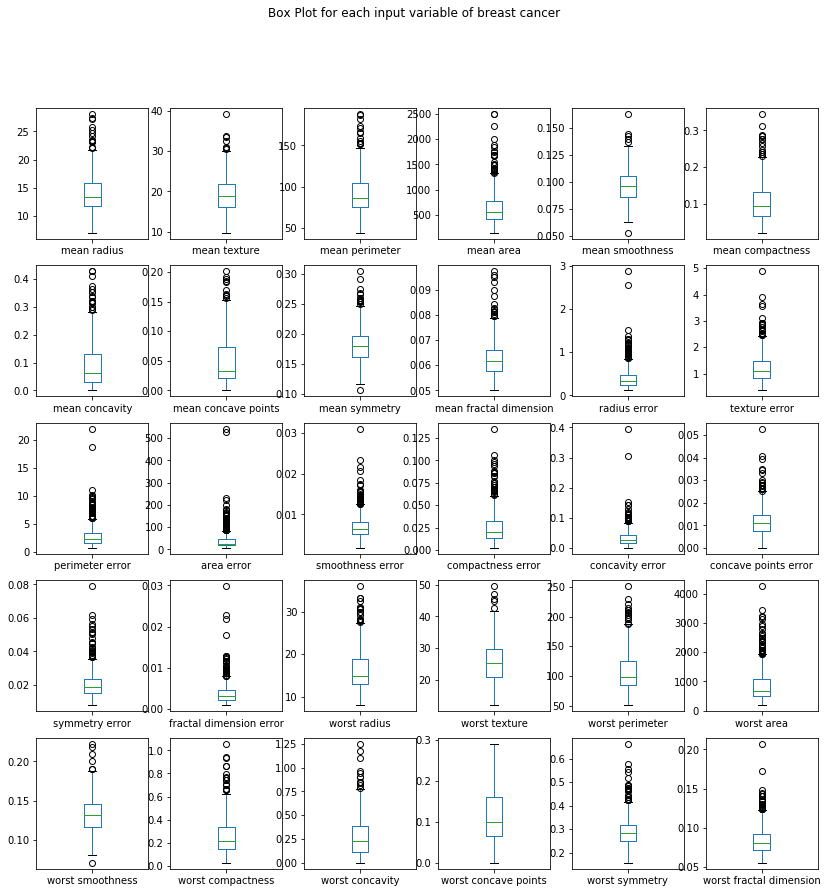

In [78]:
#checking outliers with boxplot
df.drop('diagosis', axis=1).plot(kind='box', subplots=True, layout=(5,6), 
                                        sharex=False, sharey=False, figsize=(14, 14), 
                                        title='Box Plot for each input variable of breast cancer')
plt.savefig('Breast cancer Box Plot')
plt.show()

**Yes there are some outliers in the dataset**

To get a better understanding of the correlation between each column of your dataset, create a scatter matrix of the dataset using seaborn (https://seaborn.pydata.org/examples/scatterplot_matrix.html)

Plot histgrams for the different radius parameters for the categories malignant and benign to see which features influence the diagnosis. 

In [19]:
from sklearn.feature_selection import mutual_info_regression

discrete_features = df[bc.feature_names].dtypes == int
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(df[bc.feature_names], df['diagosis'], discrete_features)
mi_scores[:11] # show a few features with their MI scores

worst perimeter         0.473421
worst area              0.464925
worst radius            0.451868
mean concave points     0.448029
worst concave points    0.432076
mean perimeter          0.404418
mean concavity          0.369856
mean radius             0.368515
mean area               0.358852
area error              0.337835
worst concavity         0.312009
Name: MI Scores, dtype: float64

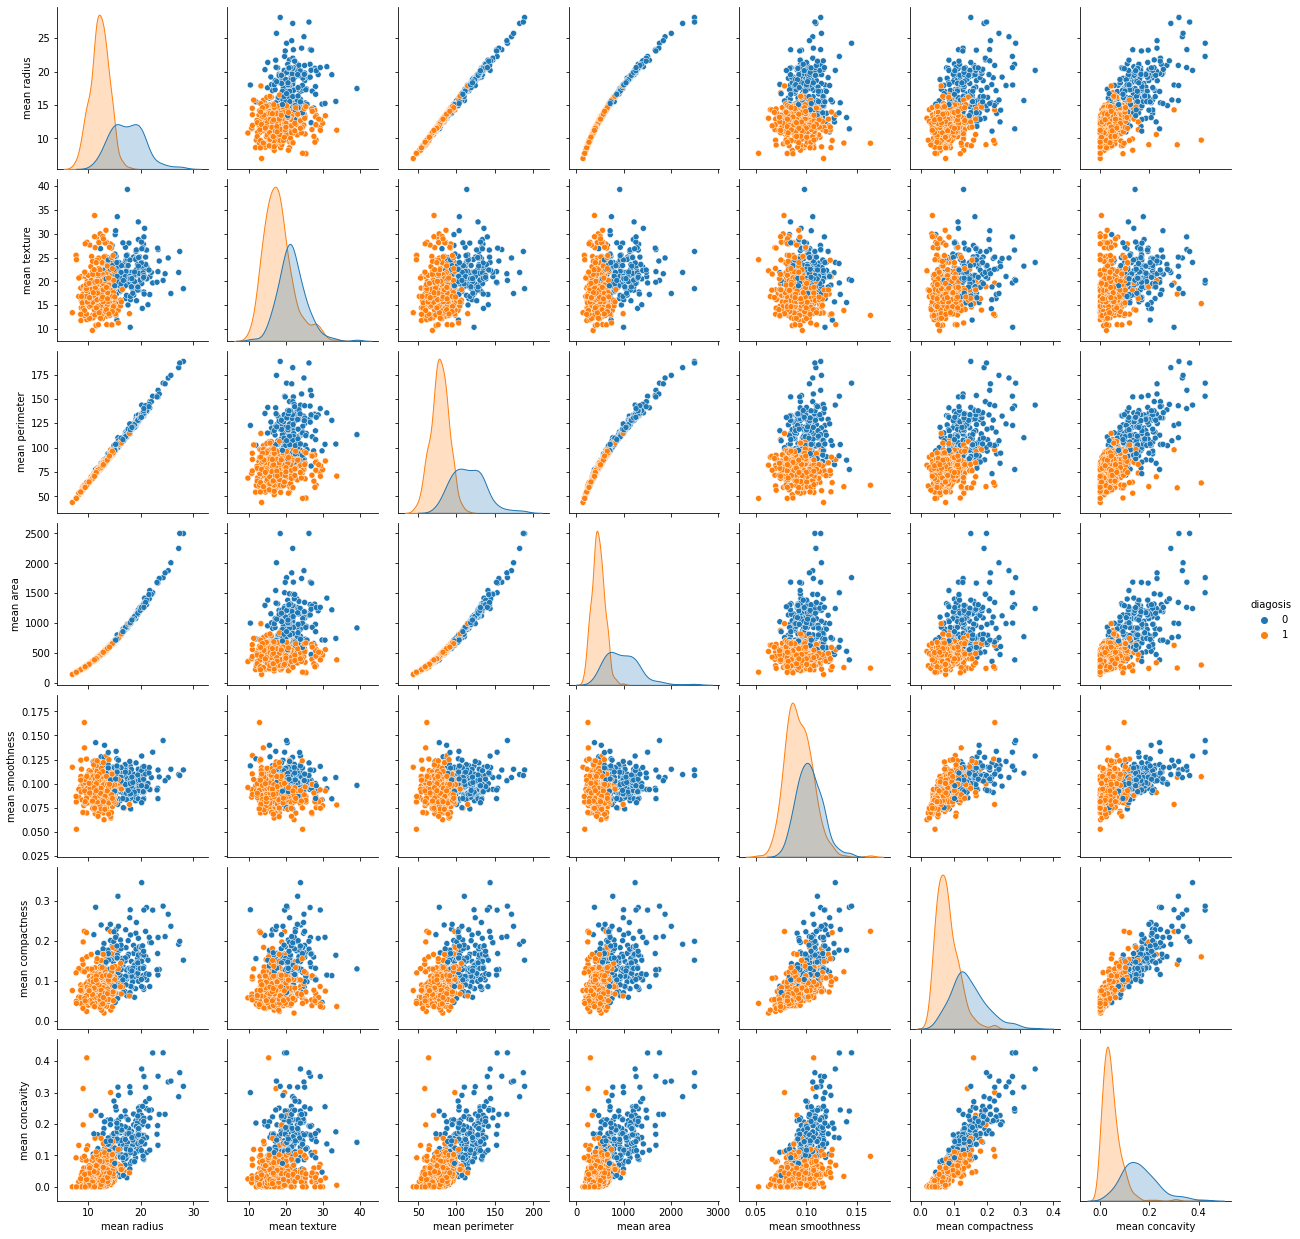

In [21]:
import seaborn as sns
#Here for scatter plot i am taking only few input variable since ploting all reusults in not clear plot
data = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness', 'mean concavity',"diagosis"]]
sns.pairplot(data, hue="diagosis")

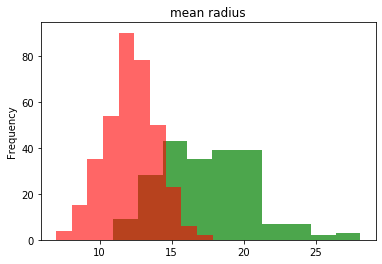

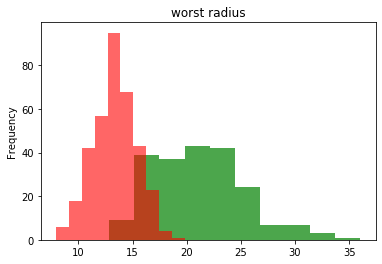

In [32]:
#Histogram
import pylab as pl
from matplotlib import pyplot as plt
for i in ('mean radius','worst radius'):
    df[i][df['diagosis'] == 0].plot.hist(alpha=0.7, color='green', title=i) # malign(0)
    df[i][df['diagosis'] == 1].plot.hist(alpha=0.6, color='red', title=i)#benign (1)
    plt.show()

Let's try to set up three models using this parameter. Each one should contain one of the all the features containing worst, error and mean in their description. Let's choose a logistic regression algorithm for this. Use train_test_split to subdivide your dataset into training and testing (80%/20% division). Have a look at the accuracy score for the model's performance. (Note: Next week you will learn more about how you can judge your model's performance).

In [79]:
y = df['diagosis']
X = df.drop(['diagosis'], axis=1)

In [80]:
#spliting data into test and train set with 20% and 80% respectively
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2, random_state=0)

In [81]:
#Normalizing data set using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
#For this model i am using all available features in dataset
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)


print('Accuracy of LogisticRegression classifier on training set: {:.2f}'
     .format(model.score(X_train, y_train)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(model.score(X_test, y_test)))

Accuracy of LogisticRegression classifier on training set: 0.97
Accuracy of LogisticRegression classifier on test set: 0.96


*****************************************************************************************************

In [83]:
#For model2 i am using features which are closely corelated to target variable
selected_features = ['worst perimeter','worst area','worst radius','mean concave points',
                       'worst concave points','mean perimeter','mean concavity','mean radius',
                       'mean area','area error','worst concavity']

X = df[selected_features]
y = df['diagosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    test_size=0.2, random_state=0)

In [87]:
"""scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)"""

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
model2 = LogisticRegression(random_state=0)
model2.fit(X_train, y_train)


print('Accuracy of LogisticRegression classifier on training set: {:.2f}'
     .format(model2.score(X_train, y_train)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(model2.score(X_test, y_test)))

Accuracy of LogisticRegression classifier on training set: 0.96
Accuracy of LogisticRegression classifier on test set: 0.93
